<a href="https://colab.research.google.com/github/hitanshu5/MachineLearning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df_index=pd.read_excel("/content/economic_index.xlsx")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployement_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [67]:
## drop unneccessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [68]:
df_index.head()

,interest_rate,unemployement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [69]:
##check null values

df_index.isnull().sum()

interest_rate         0
unemployement_rate    0
index_price           0
dtype: int64

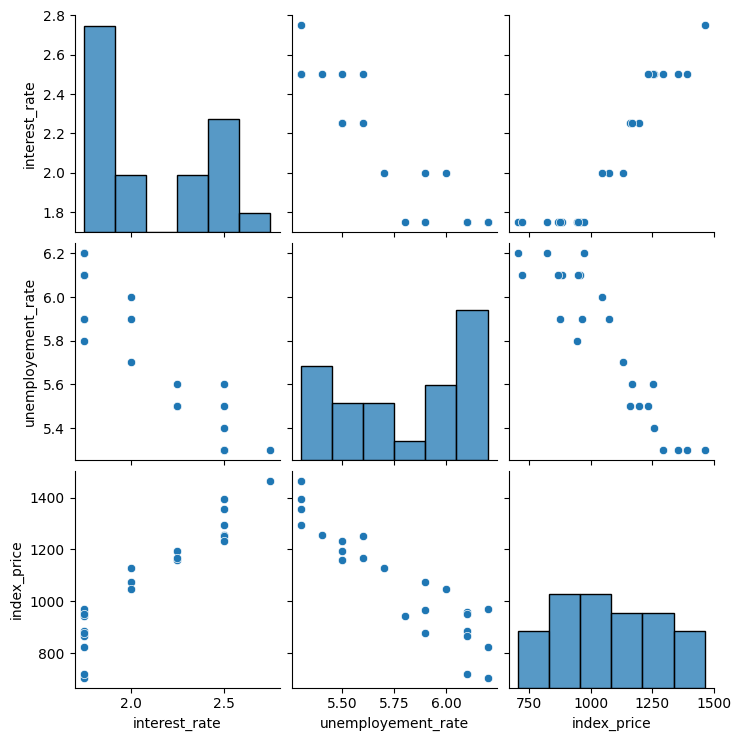

In [70]:
import seaborn as sns
sns.pairplot(df_index)

In [71]:
df_index.corr()

,interest_rate,unemployement_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployement_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement Rate')

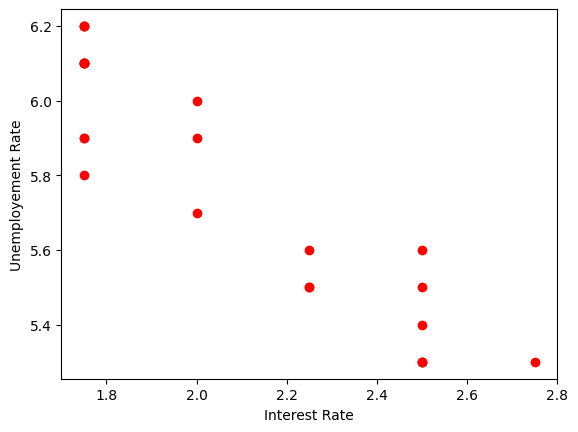

In [72]:
## visualise points
plt.scatter(df_index['interest_rate'],df_index['unemployement_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployement Rate')

In [73]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,:-1]

X.head()

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [74]:
y

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

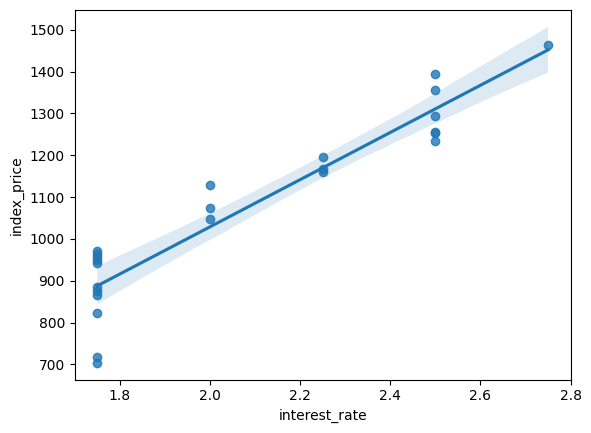

In [76]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployement_rate'>

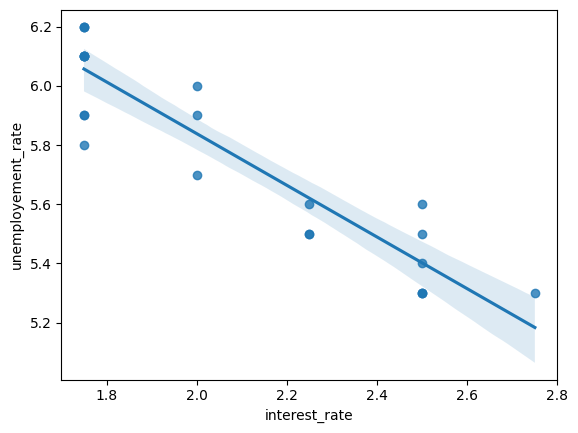

In [77]:
sns.regplot(x='interest_rate', y='unemployement_rate', data=df_index)

<Axes: xlabel='index_price', ylabel='unemployement_rate'>

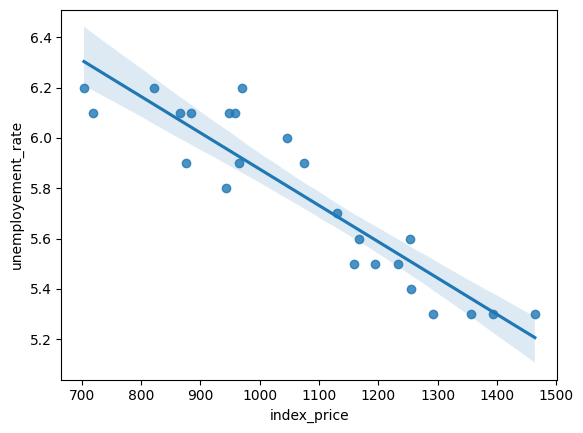

In [78]:
sns.regplot(x='index_price', y='unemployement_rate', data=df_index)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [80]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [81]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [82]:
regression.fit(X_train,y_train)

LinearRegression()

In [83]:
##Cross Validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [84]:
np.mean(validation_score)

-1.3695501826753679e-31

In [85]:
##Prediction

y_pred=regression.predict(X_test)

In [86]:
y_pred

array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ],
       [2.25, 5.6 ]])

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Mean Squared Error',mse)
print('Mean Absolute Error',mae)
print('Root Mean Squared Error',rmse)

Mean Squared Error 0.0
Mean Absolute Error 0.0
Root Mean Squared Error 0.0


In [88]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

print(1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

1.0
1.0


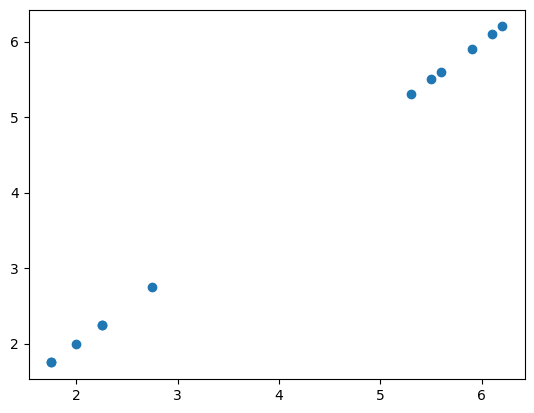

In [89]:
plt.scatter(y_test,y_pred)

In [90]:
residuals=y_test-y_pred
print(residuals)

    interest_rate  unemployement_rate
8             0.0                 0.0
16            0.0                 0.0
0             0.0                 0.0
18            0.0                 0.0
11            0.0                 0.0
9             0.0                 0.0


<ipython-input-91-23a40b5e9b27>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(residuals,kind='kde')


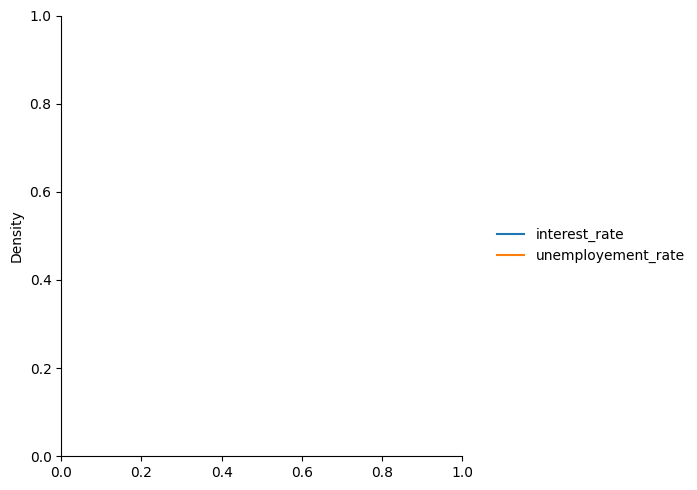

In [91]:
sns.displot(residuals,kind='kde')

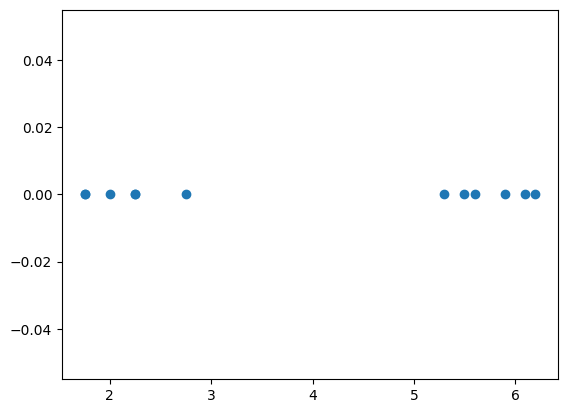

In [92]:
plt.scatter(y_pred,residuals)